# 1 - Import libraries, load data, and set mapping styles

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set(font_scale=1.25)

%matplotlib inline

In [5]:
df = pd.read_csv('profiles_clean.csv')

In [6]:
df.columns.values

array(['Unnamed: 0', 'age', 'body_type', 'diet', 'drinks', 'drugs',
       'education', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4',
       'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'ethnicity',
       'height', 'income', 'job', 'last_online', 'location', 'offspring',
       'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes',
       'speaks', 'status', 'drinks_code', 'drugs_code', 'veg_code',
       'ed_code', 'smoke_code', 'sex_code', 'has_kids', 'wants_kids'],
      dtype=object)

# 2 - Formulate Questions
With visualizations, I aim to answer the following questions:

1. How does diet correlate with age and/or gender?
2. How does age correlate with having and/or wanting kids?
3. Do drinking, smoking, and doing drugs correlate with each other?
4. How do drinking, smoking, and doing drugs correlate with having kids?
5. How does education correlate with age?

# 3 - Answer Questions with Visualizations

Quesiton #1 - How does diet correlate with age and/or gender?

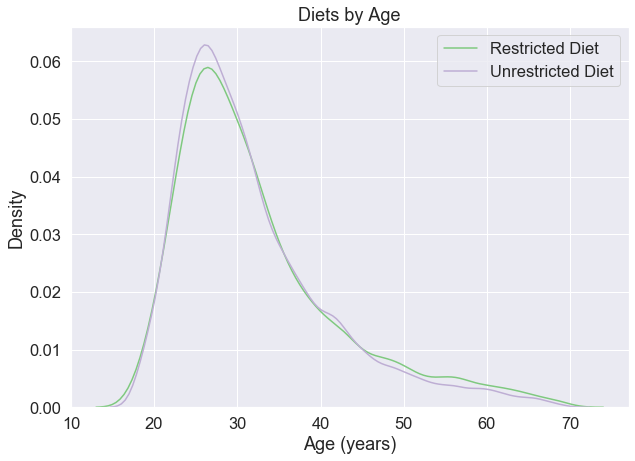

In [41]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
sns.set_palette('Accent')

sns.kdeplot(df.loc[df['veg_code'] < 6, 'age'], label='Restricted Diet')
sns.kdeplot(df.loc[df['veg_code'] == 6, 'age'], label='Unrestricted Diet')
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Diets by Age')
plt.show()

Question #2 - How does age correlate with having and/or wanting kids?

In [32]:
df['age_bin'] = pd.cut(x=df['age'], bins=[0, 20, 29, 39, 49, 59, 69], labels=['Below 20', '20s', '30s', '40s',
                                                                                  '50s', '60 plus'])

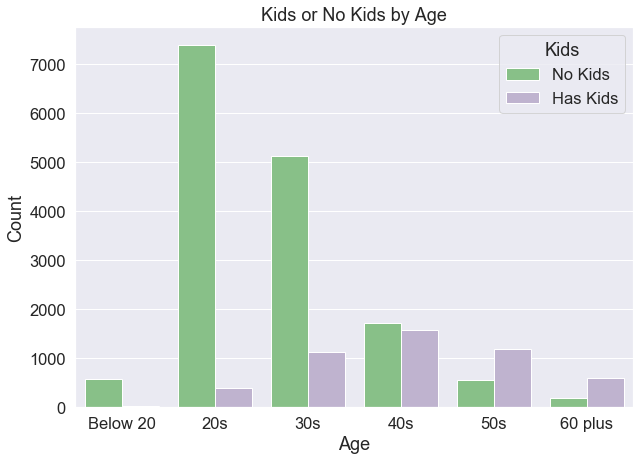

In [60]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
sns.set_palette('Accent')

has_kids = sns.countplot(data=df, x="age_bin", hue="has_kids")

has_kids.set(title="Kids or No Kids by Age", xlabel="Age", ylabel="Count")
plt.legend(title='Kids', labels=['No Kids', 'Has Kids'])
plt.show()

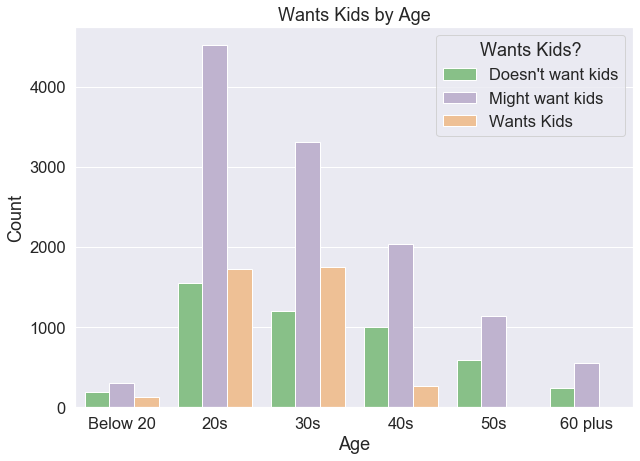

In [43]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
sns.set_palette('Accent')

wants_kids = sns.countplot(data=df, x="age_bin", hue="wants_kids")

wants_kids.set(title="Wants Kids by Age", xlabel="Age", ylabel="Count")
plt.legend(title='Wants Kids?', labels=["Doesn't want kids", "Might want kids",'Wants Kids'])

plt.show()

Question #3 - Do drinking, smoking, and doing drugs correlate with each other?

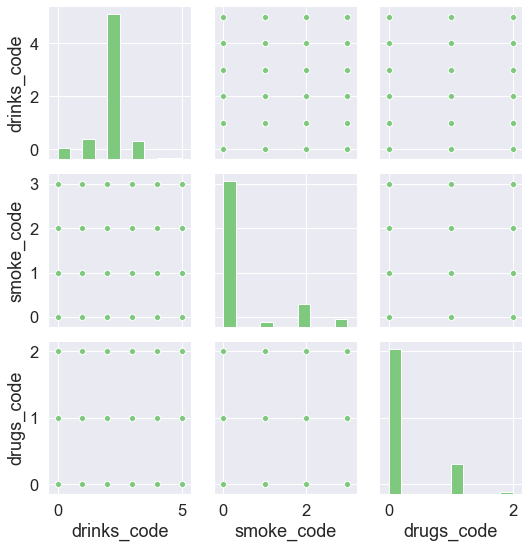

In [54]:
var_pair = sns.pairplot(df, vars=['drinks_code','smoke_code','drugs_code'])

Question #4 - How do drinking, smoking, and doing drugs correlate with having kids?

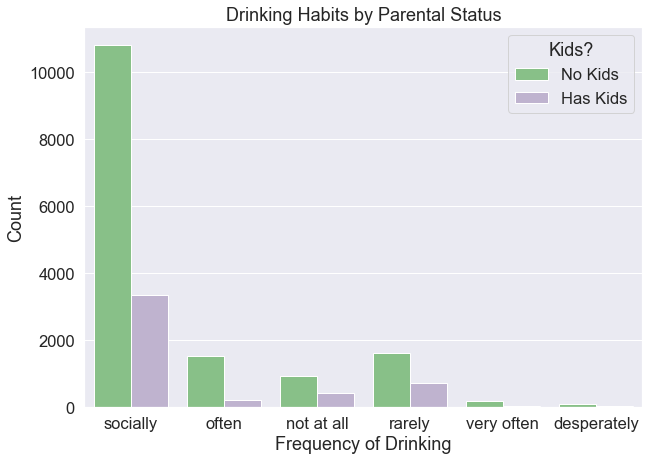

In [61]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
sns.set_palette('Accent')

drinks = sns.countplot(data=df, x="drinks", hue="has_kids")

drinks.set(title="Drinking Habits by Parental Status", xlabel="Frequency of Drinking", ylabel="Count")
plt.legend(title='Kids?', labels=['No Kids', 'Has Kids'])
plt.show()

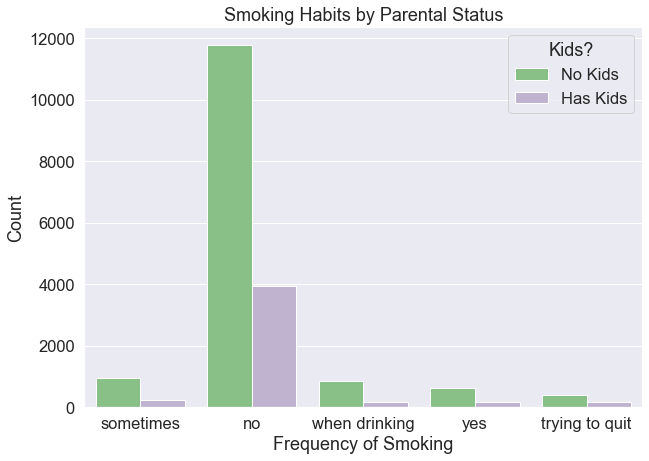

In [62]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
sns.set_palette('Accent')

smokes = sns.countplot(data=df, x="smokes", hue="has_kids")

smokes.set(title="Smoking Habits by Parental Status", xlabel="Frequency of Smoking", ylabel="Count")
plt.legend(title='Kids?', labels=['No Kids', 'Has Kids'])
plt.show()

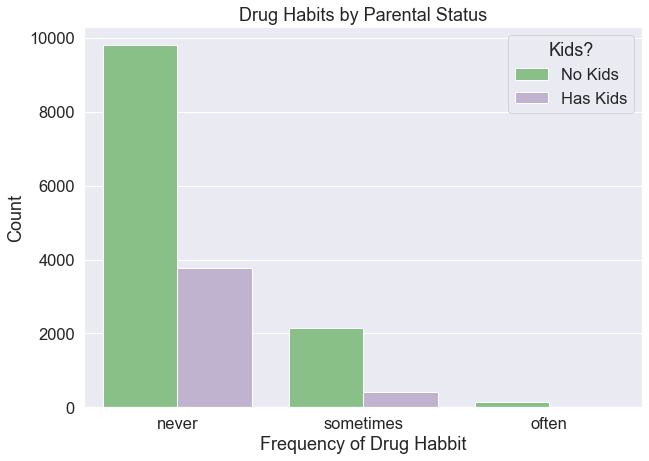

In [63]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
sns.set_palette('Accent')

drugs = sns.countplot(data=df, x="drugs", hue="has_kids")

drugs.set(title="Drug Habits by Parental Status", xlabel="Frequency of Drug Habbit", ylabel="Count")
plt.legend(title='Kids?', labels=['No Kids', 'Has Kids'])
plt.show()

Question #5 - How does education correlate with age?

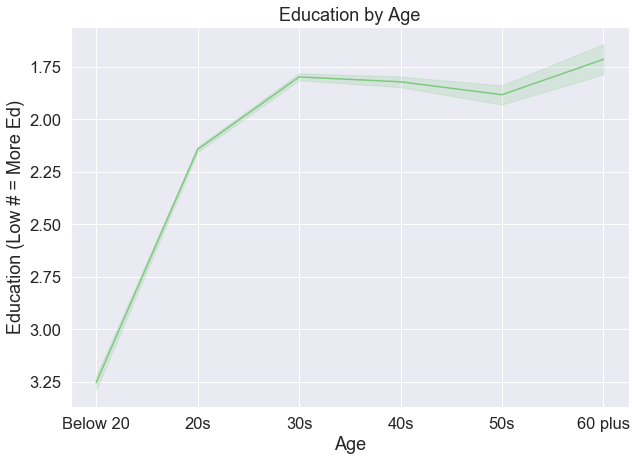

In [70]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
sns.set_palette('Accent')

ed = sns.lineplot(data=df, x="age_bin", y="ed_code")
ed.set(title="Education by Age", xlabel="Age", ylabel="Education (Low # = More Ed)")
plt.ylim(reversed(plt.ylim()))
plt.show()